In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
plt.rcParams['figure.figsize'] = [5, 3]

Cosine schedule of iDDPM:

$t \in [0,1]$<br>
$\displaystyle \alpha_t=\cos{(\pi t/2)}$

For variance preserving diffusion

$\displaystyle\sigma_t=\sqrt{1-\alpha^2_t}=\sin{(\pi t/2)}$

From VDM

$\displaystyle \text{SNR}(t)=\frac{\alpha^2_t}{\sigma^2_t};\; \log \text{SNR}(t)=2\log \alpha_t-2\log \sigma_t$

In [35]:
t = np.linspace(0,1, 5000)
alpha = np.cos(t*np.pi/2)
sigma = np.sin(t*np.pi/2)

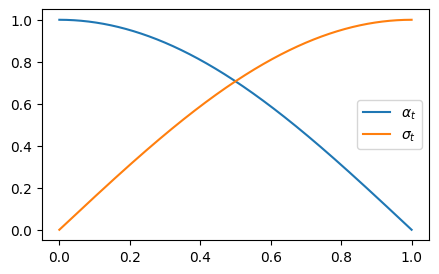

In [36]:
plt.plot(t,alpha, label=r'$\alpha_t$')
plt.plot(t,sigma, label=r'$\sigma_t$')
plt.legend();

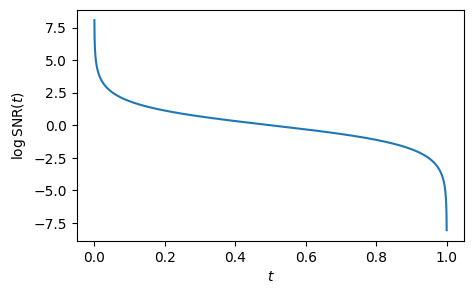

In [40]:
log_snr = - np.log(np.tan(t[1:-1]*np.pi/2))
plt.plot(t[1:-1],log_snr)
plt.xlabel(r'$t$')
plt.ylabel(r'$\log \text{SNR}(t)$');

Simple diffusion https://arxiv.org/abs/2301.11093 proposes using shifted noise shedule for higher resolutions to keep variance after downsampling unchanged.

$\displaystyle SNR(t)=\frac{\alpha_t^2}{\sigma^2_t}$

Since $z_t^{64\times 64}\sim \mathcal{N}(\alpha_t x^{64\times64},\sigma_t/2)$ after pooling we will compensate with SNR so that

$\displaystyle \text{SNR}^{d/s\times d/s}(t)=\text{SNR}^{d\times d}(t)\cdot s^2$

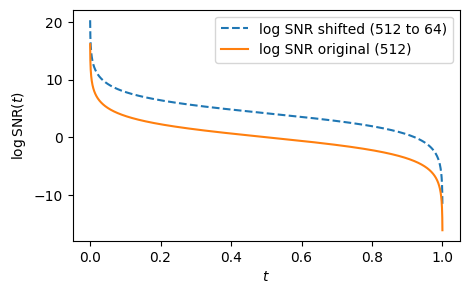

In [39]:
s = 8
log_snr = - 2*np.log(np.tan(t[1:-1]*np.pi/2))
shifted_log_snr = log_snr + 2*np.log(s)
plt.plot(t[1:-1],shifted_log_snr, linestyle='--', label="log SNR shifted (512 to 64)")
plt.plot(t[1:-1],log_snr, label="log SNR original (512)")
plt.legend()
plt.xlabel(r'$t$')
plt.ylabel(r'$\log \text{SNR}(t)$');